## Завдання 3
Зчитуємо дані що використовувались в моїх лабораторних роботах

In [6]:
filenames <- list.files(path="../quantquote_daily_sp500_83986/daily", full.names=TRUE)

datalist = lapply(filenames,
    function(x){x0<-read.csv(file=x,header=F)[,c(1,6)];
    colnames(x0)<-c("data",
    unlist(strsplit(x,"[_.]"))[7]);
    x0})

y<-Reduce(function(x,y) {merge(x,y,by="data")}, datalist)   

Виділимо перші 50 записів

In [7]:
Data<-y[-nrow(y),-1]#delete the last raw and first column
Data_first50 <- Data[0:50,]

Підженемо модель рідж регресії для наших даних перебираючи коефіцієнт від 0 до 50 з кроком 0.01

In [8]:
library(MASS)
RidgeModel <- lm.ridge(act ~ .,
            data=Data_first50,lambda = seq(0, 50, .01))
summary(RidgeModel)

       Length Class  Mode   
coef   45009  -none- numeric
scales     9  -none- numeric
Inter      1  -none- numeric
lambda  5001  -none- numeric
ym         1  -none- numeric
xm         9  -none- numeric
GCV     5001  -none- numeric
kHKB       1  -none- numeric
kLW        1  -none- numeric

Обираємо значення нашого лямбда для якого CV матиме мінімальне значення, це є найбільш якісним значенням для нашої моделі

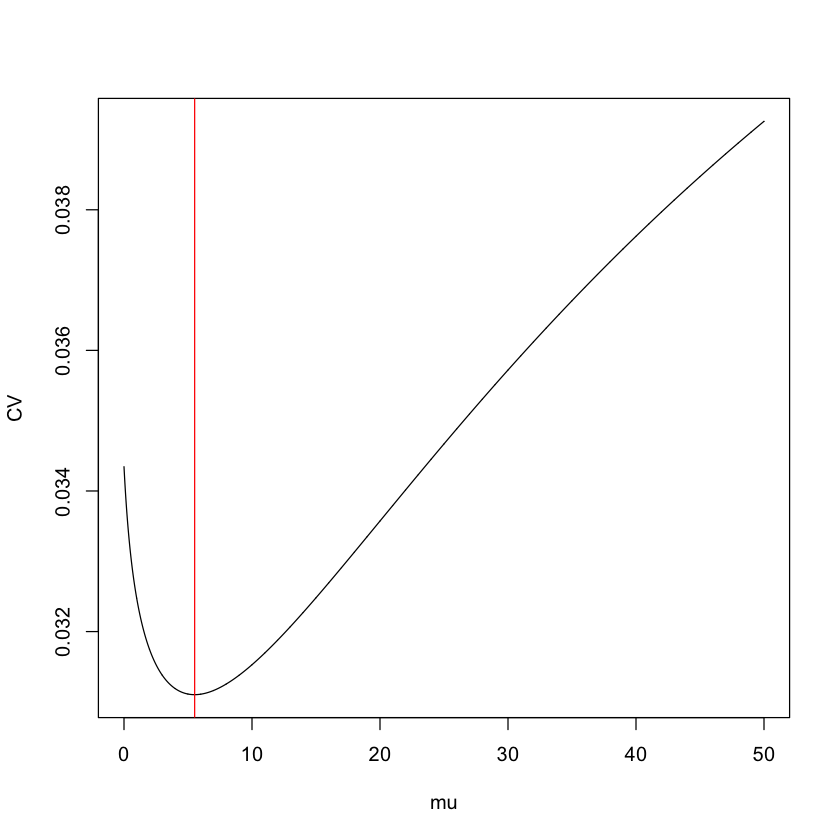

In [9]:
plot(RidgeModel$lambda,RidgeModel$GCV,type="l",xlab="mu",ylab="CV")
i<-which.min(RidgeModel$GCV)
abline(v=RidgeModel$lambda[i],col="red")

Отримаємо кінцеві коефіцієнти моделі. Коефіцієнти рознормовуємо, так як рідж модель тримає їх для нормованих даних.
Вираховуємо, що вільний член буде -F(Мх) + My, де Мх Му це середні значення регресорів та відгуку відповідно. F без вільного члена проходить через точку 0, а має проходити через точку (Мх, Му). Тобто F(Mx) = My. Для цього до F очевидно потрібрно додати -F(Мх) + My.

In [13]:
coefs <- matrix(RidgeModel$coef[,i]/RidgeModel$scales,ncol=1)
intercept <- -sum(matrix(colMeans(Data_first50[,!names(Data_first50) %in% 
            c("act")])) * coefs) + mean(Data_first50$act)

In [14]:
coefs

0.532885101
0.032857999
0.003679823
-0.405731851
0.260690790
0.345541320
-0.029684565
0.037671031
0.728135653


In [15]:
intercept

[1] 23.43836